In [42]:
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt
import matplotlib

# 
The next command will help to load the MNIST dataset

In [43]:
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

# 
The matplotlib is used to plot the images which are in the form of 28*28 pixels

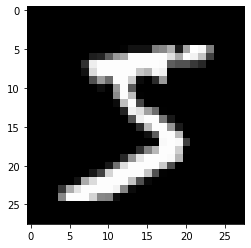

In [44]:
plt.figure(figsize=(20, 4))
plt.imshow(Xtrain[0].reshape(28, 28),cmap=matplotlib.cm.binary,interpolation="nearest")
plt.gray()
plt.show()
plt.close()

# 
This helps to add the preprocessing step to train and test data before prediction

In [45]:
print("Previous X training {} \nPrevious Y train shape:{}".format(Xtrain.shape, Ytrain.shape))
Xtrain = Xtrain.reshape(60000, 784)     
Xtest = Xtest.reshape(10000, 784)
Xtrain = Xtrain.astype('float32')     
Xtest = Xtest.astype('float32')     
Xtrain /= 255    
Xtest /= 255

Previous X training (60000, 28, 28) 
Previous Y train shape:(60000,)


In [46]:
classes = 10
Ytrain = np_utils.to_categorical(Ytrain, classes)     
Ytest = np_utils.to_categorical(Ytest, classes)
print("New X_train shape: {} \nNew Y_train shape:{}".format(Xtrain.shape, Ytrain.shape))

New X_train shape: (60000, 784) 
New Y_train shape:(60000, 10)


# 
Lets look for the parameter for out neural network
-> input size is 784 pixels
-> batch_size is No of training examples in one pass
->We are using TWO hidden layers
->Epochs refers to 1 cycle through full training dataset

In [47]:
input_size = 784
batch_size = 200   
hidden1 = 400
hidden2 = 20
epochs=2


# 
->The sequential allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs. 
->The relu is ReLU stands for rectified linear unit, and is a type of activation function
->Softmax is a type of squashing function. Squashing functions limit the output of the function into the range 0 to 1. 

In [48]:
model = Sequential()     
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
model.add(Dense(hidden2, activation='relu'))
model.add(Dense(classes, activation='softmax')) 

# 
Optimizer : Stochastic gradient descent optimizer 

In [49]:
# Compilation
model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='sgd')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_8 (Dense)              (None, 20)                8020      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
Total params: 322,230
Trainable params: 322,230
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=15, verbose=2)

Epoch 1/15
 - 5s - loss: 1.4956 - accuracy: 0.6486
Epoch 2/15
 - 3s - loss: 0.6431 - accuracy: 0.8509
Epoch 3/15
 - 3s - loss: 0.4591 - accuracy: 0.8817
Epoch 4/15
 - 3s - loss: 0.3907 - accuracy: 0.8949
Epoch 5/15
 - 3s - loss: 0.3534 - accuracy: 0.9034
Epoch 6/15
 - 3s - loss: 0.3286 - accuracy: 0.9092
Epoch 7/15
 - 3s - loss: 0.3097 - accuracy: 0.9140
Epoch 8/15
 - 3s - loss: 0.2945 - accuracy: 0.9170
Epoch 9/15
 - 2s - loss: 0.2818 - accuracy: 0.9200
Epoch 10/15
 - 2s - loss: 0.2707 - accuracy: 0.9235
Epoch 11/15
 - 2s - loss: 0.2605 - accuracy: 0.9265
Epoch 12/15
 - 2s - loss: 0.2517 - accuracy: 0.9286
Epoch 13/15
 - 2s - loss: 0.2433 - accuracy: 0.9312
Epoch 14/15
 - 3s - loss: 0.2358 - accuracy: 0.9331
Epoch 15/15
 - 3s - loss: 0.2286 - accuracy: 0.9359


In [51]:
score = model.evaluate(Xtest, Ytest, verbose=1)
print('\n''Test accuracy:', score)


10000/10000 [==============================] - 2s 157us/step

Test accuracy: [0.2206049014568329, 0.9386000037193298]


This is the prediction for the below data from test: [3 1 3 6 7 2 7 1 2 1]


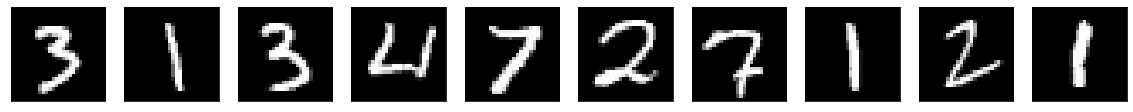

In [52]:
mask = range(30,40)
n=10
X_valid = Xtest[mask]
y_pred = model.predict_classes(X_valid)
print("This is the prediction for the below data from test:",y_pred)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [53]:
model.save('C:\\Users\\User\\Documents\\Multimedia Project\\Multimedia Project\\output\\Neural_Network')